In [1]:
import numpy as np

import matplotlib.pyplot as plt

from continous_tf import Continous_TF
from falling_factorial_gen import Falling_Factorial_Basis

from adaptive_tf import adaptive_tf
from cv_tf import cross_validation
from matrix_algorithms.difference_matrix import Difference_Matrix

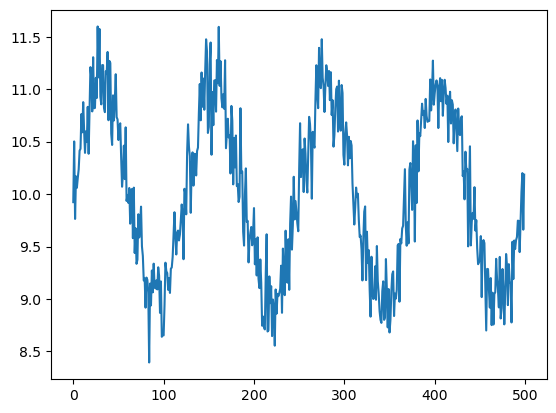

In [27]:
noisy_signal =np.sin(4*np.linspace(0, 2 * np.pi, 500)) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Prep Adaptive TF Problem

In [28]:
D=Difference_Matrix(500,3)

In [29]:
best_lambda=cross_validation(noisy_signal.reshape(-1,1),D,cv_folds=25,cv_iterations=3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 4.0262122299149325
No solution found for lambda = 4.0262122299149325
Status: negative duality gap
Performing cross validation for lambda = 8.674211297559351
No solution found for lambda = 8.674211297559351
Status: negative duality gap
Performing cross validation for lambda = 18.68802172812837
No solution found for lambda = 18.68802172812837
Status: negative duality gap
Performing cross validation for lambda = 40.26212229914932
No solution found for lambda = 40.26212229914932
Status: negative duality gap
Performing cross validation for lambda = 86.7421129755935
No solution found for lambda = 86.7421129755935
Status: negative duality gap
Performing cross validation for lambda = 186.8802172812833
No solution found for lambda = 186.8802172812833
Status: negative duality gap
Performing cross validation for lambda = 402.6212229914932
No solution found for lambda = 402.6212229914932
Status: maxiter 

In [31]:
results=adaptive_tf(noisy_signal.reshape(-1,1),D,prior=best_lambda)

### Let's Visualize results

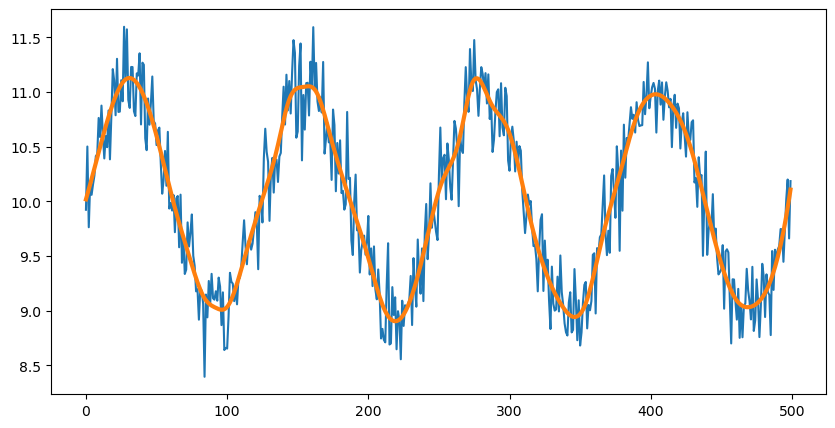

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)

### Construction of Falling Factorial Basis

In [33]:
x_tf=results["sol"].x

t=np.arange(1,501)
ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1.]
 [1.]]
Shape of h_j_x: (2, 1)


In [34]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [39]:
ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Number of theta coefficients: {len(ctf.theta)}")


Number of phi coefficients: 4
Number of theta coefficients: 496


In [40]:
ctf.h_j_x(np.array([105.55]))


array([[1.00000000e+00],
       [1.00000000e+00],
       [1.04550000e+02],
       [1.08261525e+04]])

### Let's Visualize the Coefficients

<StemContainer object of 3 artists>

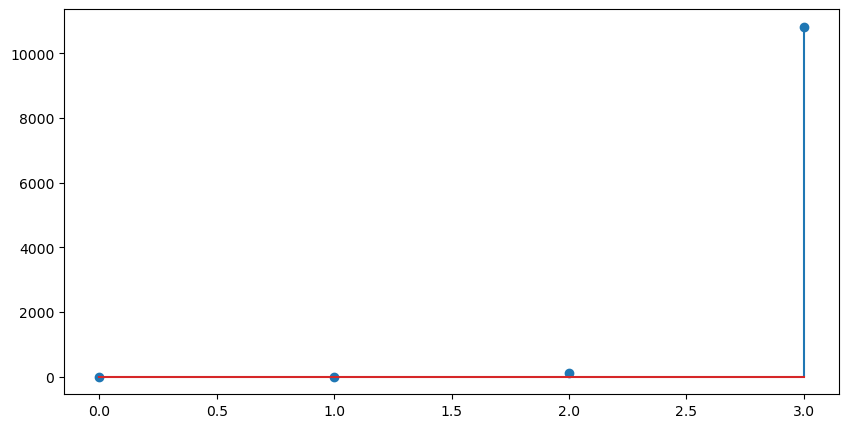

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.stem(np.arange(0,len(ctf.phi)),ctf.h_j_x(np.array([105.55])).flatten(),label="phi")

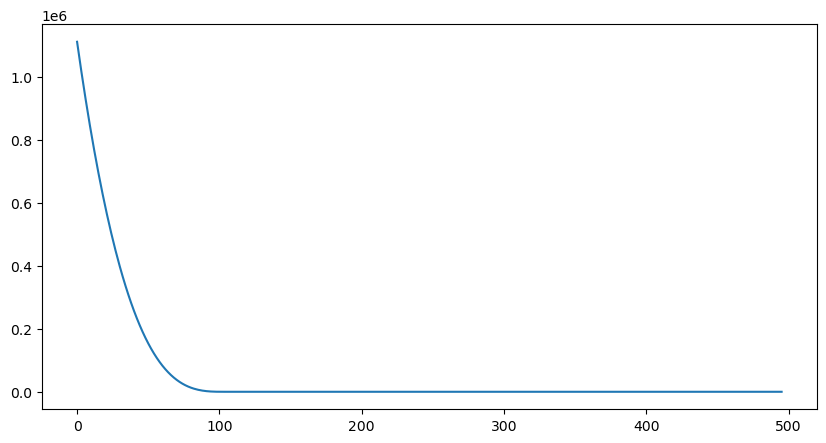

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(np.arange(0,len(ctf.theta)),ctf.h_k_j_x(np.array([105.55])),label="theta")

### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

In [43]:
ctf.T_D.T_D

array([[ 1., -4.,  6., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  6., -4.,  1.]])

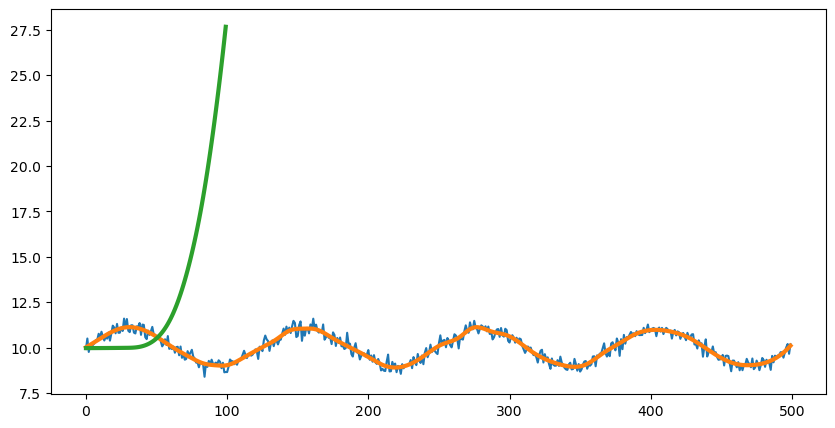

In [44]:
x_equal=np.arange(0,100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)
ax.plot(x_equal,ctf.evaluate_tf(x_equal).reshape(-1),label="Continous TF",lw=3)
